<a href="https://colab.research.google.com/github/Mohansabariraja/Bidirectional_LSTM/blob/main/Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("CIFAR-10 dataset loaded.")

print("Normalizing pixel values...")
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print("Pixel values normalized.")

print("Reshaping image data for LSTM...")

img_rows, img_cols, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols * img_channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols * img_channels)
print("Image data reshaped.")

print("Verifying data shapes:")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
CIFAR-10 dataset loaded.
Normalizing pixel values...
Pixel values normalized.
Reshaping image data for LSTM...
Image data reshaped.
Verifying data shapes:
x_train shape: (50000, 32, 96)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 96)
y_test shape: (10000, 1)


In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Flatten

input_shape = x_train.shape[1:] # (32, 96)
num_classes = 10

print(f"Model input shape: {input_shape}")


model = Sequential([

    Bidirectional(LSTM(128, return_sequences=False), input_shape=input_shape),

    Dense(64, activation='relu'),

    Dense(num_classes, activation='softmax')
])

print("Bidirectional LSTM model constructed.")

model.summary()



Model input shape: (32, 96)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Bidirectional LSTM model constructed.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       230,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,498 (966.79 KB)

 Trainable params: 247,498 (966.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Flatten, Input

# 2. Define the input shape for the model
input_shape = x_train.shape[1:] # (32, 96)
num_classes = 10

print(f"Model input shape: {input_shape}")

# 3. Create the model using the Keras Sequential API
model = Sequential([
    Input(shape=input_shape),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

print("Bidirectional LSTM model constructed.")

model.summary()

Model input shape: (32, 96)
Bidirectional LSTM model constructed.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       230,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,498 (966.79 KB)

 Trainable params: 247,498 (966.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

print("Compiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("Model compiled successfully.")

Compiling the model...
Model compiled successfully.


In [6]:

history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    verbose=1) # Set to 1 to show progress bar
print("Model training complete.")

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3029 - loss: 1.9025 - val_accuracy: 0.4369 - val_loss: 1.5658
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4483 - loss: 1.5251 - val_accuracy: 0.4914 - val_loss: 1.4173
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4957 - loss: 1.3868 - val_accuracy: 0.5135 - val_loss: 1.3408
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5280 - loss: 1.3009 - val_accuracy: 0.5329 - val_loss: 1.2953
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5567 - loss: 1.2296 - val_accuracy: 0.5528 - val_loss: 1.2374
Model training complete.


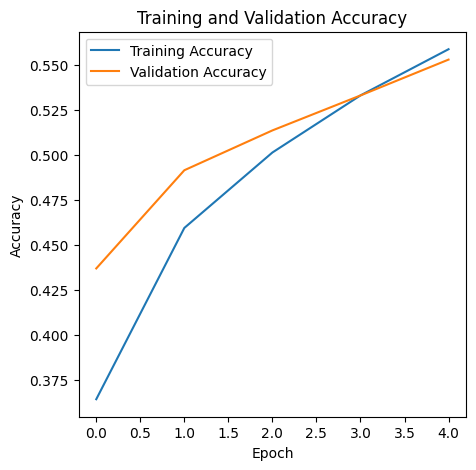

In [7]:

import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


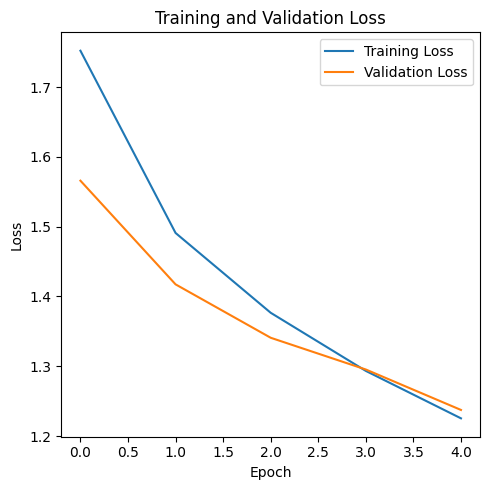

In [8]:

plt.figure(figsize=(5, 5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5565 - loss: 1.2373
Test Loss: 1.2374
Test Accuracy: 0.5528
